# Functions:

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def Mean(data):
    s=0
    n=0
    for i in data:
        s+=i  
        n+=1
    return s/n
 
def count(data):
    c=0
    for i in data:
        c+=1
    return c

def Sum(data):
    s=0
    for i in data:
        s+=i
    return s

def det(data):
    sum=0
    sum=sum+mat[0][0]*((mat[1][1]*mat[2][2])-(mat[2][1]*mat[1][2]))
    sum=sum-mat[0][1]*((mat[1][0]*mat[2][2])-(mat[2][0]*mat[1][2]))
    sum=sum+mat[0][2]*((mat[1][0]*mat[2][1])-(mat[1][1]*mat[2][0]))
    return sum


# Write a python program to find the best fit straight line and draw the scatter plot:

Enter x values:1 2 3 4 6 8
Enter y values:2.4 3 3.6 4 5 6
Best Fit


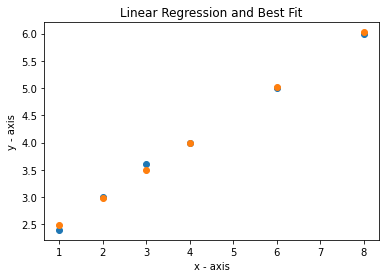

In [17]:
def reg(x,y):
    if(count(x)!=count(y)):
        print('Invalid data, no of x values and no of of y values should be the same')
        return
    c=x*y
    sigxy=Sum(c)
    sigx=Sum(x)
    sigy=Sum(y)
    x2=x*x
    sigx2=Sum(x2)
    n=count(y)
    m=((n*sigxy)-(sigx*sigy))/((n*sigx2)-(sigx**2))
    c=(sigy-(m*sigx))/n
    ycap=m*x+c
    ybar=Mean(y)
    SST=0
    for i in range(n):
        SST+=(y[i]-ybar)**2
    SSE=0
    for i in range(n):
        SSE+=(y[i]-ycap[i])**2
    
    r=1-(SSE/SST)
    if(r>0.9):
        print('Best Fit')
    else:
        print('Not a Best Fit')
        
    plt.scatter(x,y)
    plt.scatter(x,ycap)
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title('Linear Regression and Best Fit')
    plt.show()
    
x=list(map(float,input('Enter x values:').split()))
x=np.array(x)
y=list(map(float,input('Enter y values:').split()))
y=np.array(y)
reg(x,y)

# Write a python program to fit a second degree parabola of the form y=a+bx+cx2 and draw the scatter plot:

Enter values of x:0 1 2 3 4
Enter values of y:1 1.8 1.3 2.5 6.3
Best Fit


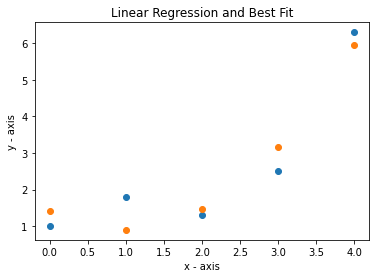

In [14]:
def bfpara(x,y):
    if(count(x)!=count(y)):
        print('Invalid Data, no of x values and no of y values should be the same.')
    n=count(x)
    dm=np.array([[n,Sum(x),Sum(x*x)],
                 [Sum(x),Sum(x*x),Sum(x*x*x)],
                 [Sum(x*x),Sum(x*x*x),Sum(x*x*x*x)]])
    d=det(dm)
    dm1=np.array([[Sum(y),Sum(x),Sum(x*x)],
                  [Sum(x*y),Sum(x*x),Sum(x*x*x)],
                  [Sum((x*x)*y),Sum(x*x*x),Sum(x*x*x*x)]])
    d1=det(dm1)
    dm2=np.array([[n,Sum(y),Sum(x*x)],
                  [Sum(x),Sum(x*y),Sum(x*x*x)],
                  [Sum(x*x),Sum((x*x)*y),Sum(x*x*x*x)]])
    d2=det(dm2)
    dm3=np.array([[n,Sum(x),Sum(y)],
                  [Sum(x),Sum(x*x),Sum(x*y)],
                  [Sum(x*x),Sum(x*x*x),Sum((x*x)*y)]])
    d3=det(dm3)
    a=d1/d
    b=d2/d
    c=d3/d
    ycap=a+(b*x)+(c*x*x)
    ybar=Mean(y)
    SST=0
    for i in range(n):
        SST+=(y[i]-ybar)**2
    SSE=0
    for i in range(n):
        SSE+=(y[i]-ycap[i])**2
    r=1-(SSE/SST)
    if(r>0.9):
        print('Best Fit')
    else:
        print('Not a Best Fit')
    plt.scatter(x,y)
    plt.scatter(x,ycap)
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title('Linear Regression and Best Fit')
    plt.show()
    
x=list(map(float,input('Enter values of x:').split()))
x=np.array(x)
y=list(map(float,input('Enter values of y:').split()))
y=np.array(y)
bfpara(x,y)

# 3.	Write a python program to find Karl Pearson’s correlation coefficient. 

In [2]:
def COV(x,y):
    n=count(x)
    xbar=Mean(x)
    ybar=Mean(y)
    sigxy=Sum(x*y)
    co=(sigxy/n)-(xbar*ybar)
    return co
    
def sigma(data):
    n=count(data)
    databar=Mean(data)
    sigdata2=Sum(data*data)
    sig=math.sqrt((sigdata2/n)-(databar)**2)
    return sig
    
def corcoe(x,y):
    if(count(x)!=count(y)):
        print('Invalid Data, no of x values and no of y values should be the same.')
    r=round(COV(x,y)/(sigma(x)*sigma(y)),4)
    return r
    
x=list(map(float,input('Enter values of x:').split()))
x=np.array(x)
y=list(map(float,input('Enter values of y:').split()))
y=np.array(y)
print("The Karl Pearson's Corelation coefficient is ",corcoe(x,y))

Enter values of x:6 8 9 10 11 12 14 16
Enter values of y:14 17 15 18 16 22 25 26
The Karl Pearson's Corelation coefficient is  0.9201


# 4. Write a python program to find the Spearman’s correlation coefficient between x and y variables.

In [11]:
def Rankify(a):
    N=count(a)
    bn=1
    sn=0
    ranks=[]
    for i in range(N):
        for j in range(i):
            if(a[j]>a[i]):
                bn+=1
            if(a[j]==a[i]):
                sn+=1
        for j in range(i+1,N-1):
            if(a[j]>a[i]):
                bn+=1
            if(a[j]==a[i]):
                sn+=1
        
        ranks.append(bn+sn*0.5)
    return ranks
    
def deldupli(a):
    b=[]
    for i in a:
        if i not in b:
            b.append(i)
    return b

def CF(a,b):
    a=list(a)
    b=list(b)
    cf=0
    nda=deldupli(a)
    ndb=deldupli(b)
    for i in nda:
        count = a.count(i)
        if count > 1:
            cf += (count * (count**2 - 1)) / 12
            
    for i in ndb:
        count = b.count(i)
        if count > 1:
            cf += (count * (count**2 - 1)) / 12
    return cf

def SRCC(x,y):
    n=count(x)
    if(count(x)!=count(y)):
        print('Invalid Data, no of x values and no of y values should be the same.')
    
    rankx=Rankify(x)
    ranky=Rankify(y)
    di=np.subtract(rankx,ranky)
    di2=di**2
    sumdi2=Sum(di2)
    
    cf=CF(x,y)
    sumdi2+=cf
    SRCC = 1 - ((6 * sumdi2) / (n * (n**2 - 1)))
    data={
         "X values": x,
        "Y values": y,
        "Ranks of X": rankx,
        "Ranks of Y": ranky,
        "di values": di,
        "di square values": sumdi2,
    }
    print(pd.DataFrame(data))
    print("Sum of di square is:",sumdi2)
    print("Correction Factor is:",cf)
    print("Spearmans Rank Correlation Coefficient of the given data is:",SRCC)
    return SRCC
    


x=list(map(float,input('Enter values of x:').split()))
x=np.array(x)
y=list(map(float,input('Enter values of y:').split()))
y=np.array(y)
SRCC(x,y)

Enter values of x:68  64  75  50  64  80  75  40  55  64
Enter values of y:62  58  68  45  81  60  68  48  50  70
   X values  Y values  Ranks of X  Ranks of Y  di values  di square values
0      68.0      62.0         4.0         4.0        0.0             32.75
1      64.0      58.0         8.5         9.0       -0.5             32.75
2      75.0      68.0        10.0        10.5       -0.5             32.75
3      50.0      45.0        17.0        18.5       -1.5             32.75
4      64.0      81.0        21.5        18.5        3.0             32.75
5      80.0      60.0        21.5        22.5       -1.0             32.75
6      75.0      68.0        23.0        24.0       -1.0             32.75
7      40.0      48.0        31.0        31.0        0.0             32.75
8      55.0      50.0        37.0        37.0        0.0             32.75
9      64.0      70.0        42.0        38.0        4.0             32.75
Sum of di square is: 32.75
Correction Factor is: 3.0
Spearman

0.8015151515151515